In [14]:
import numpy as np
import torch
from PIL import Image
from waf_torch.wavelet import Wavelet
import matplotlib.pyplot as plt

1. Сравнение функций chi для разных вейвлетов

2. Вейвлеты во временной области

3. Масштабирующие функции во временной области


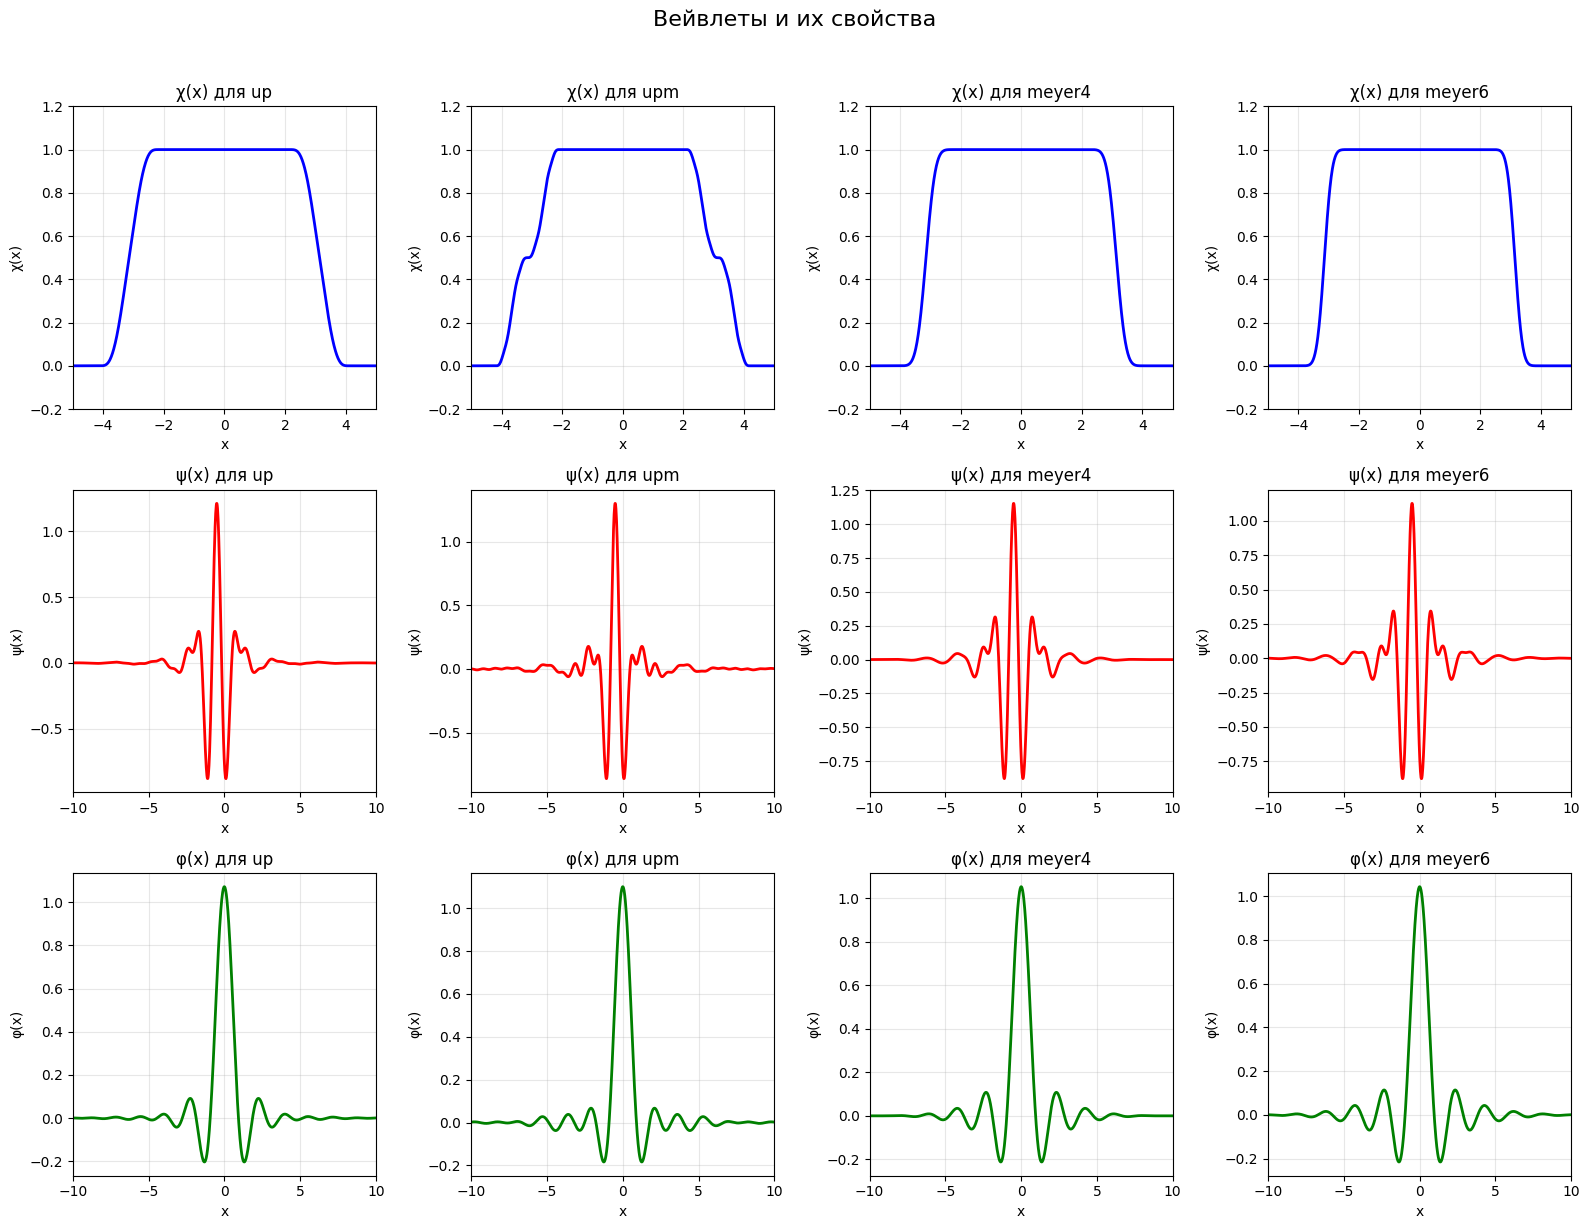


4. Фильтры для вейвлет-преобразования


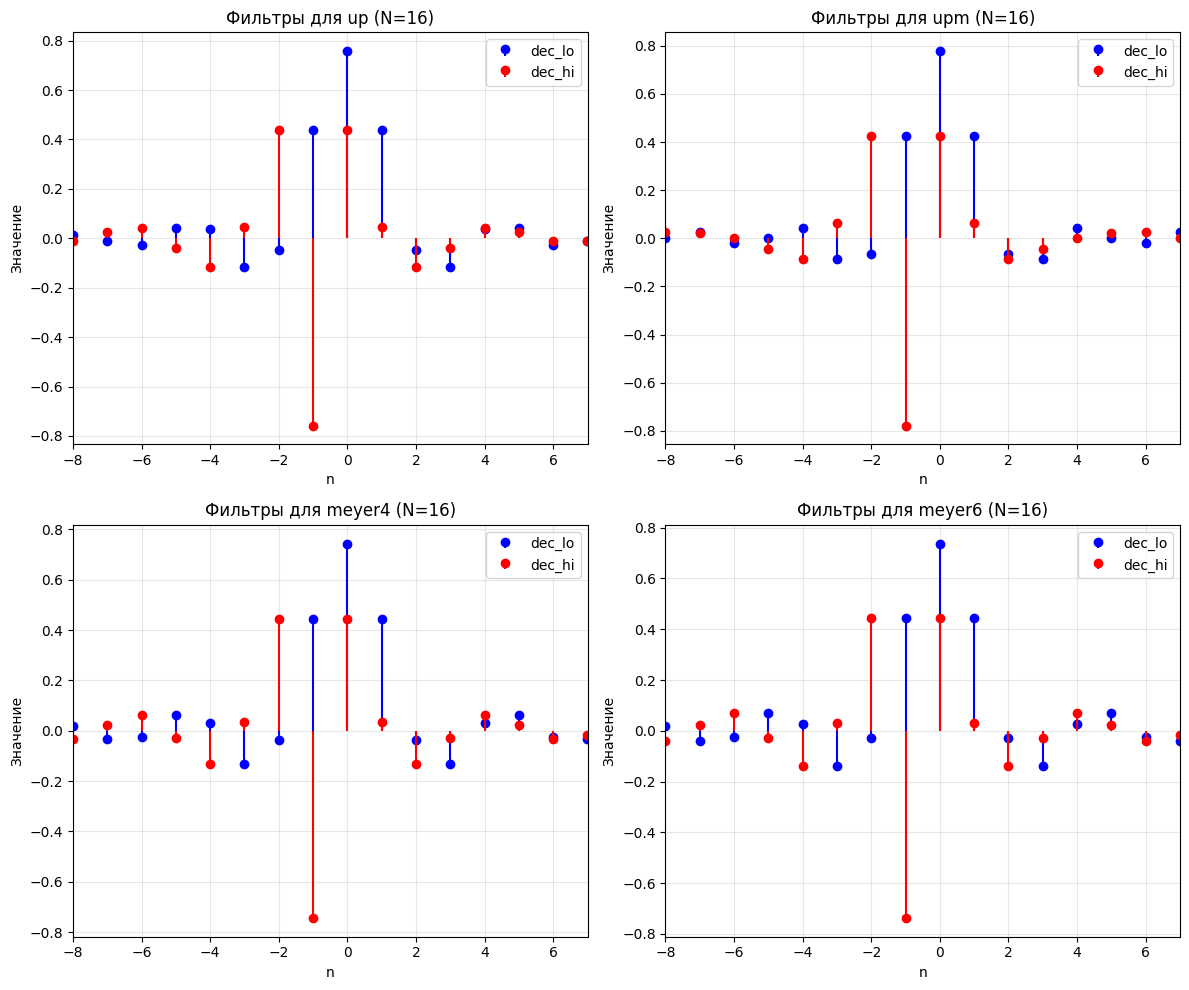


5. Частотные характеристики вейвлетов


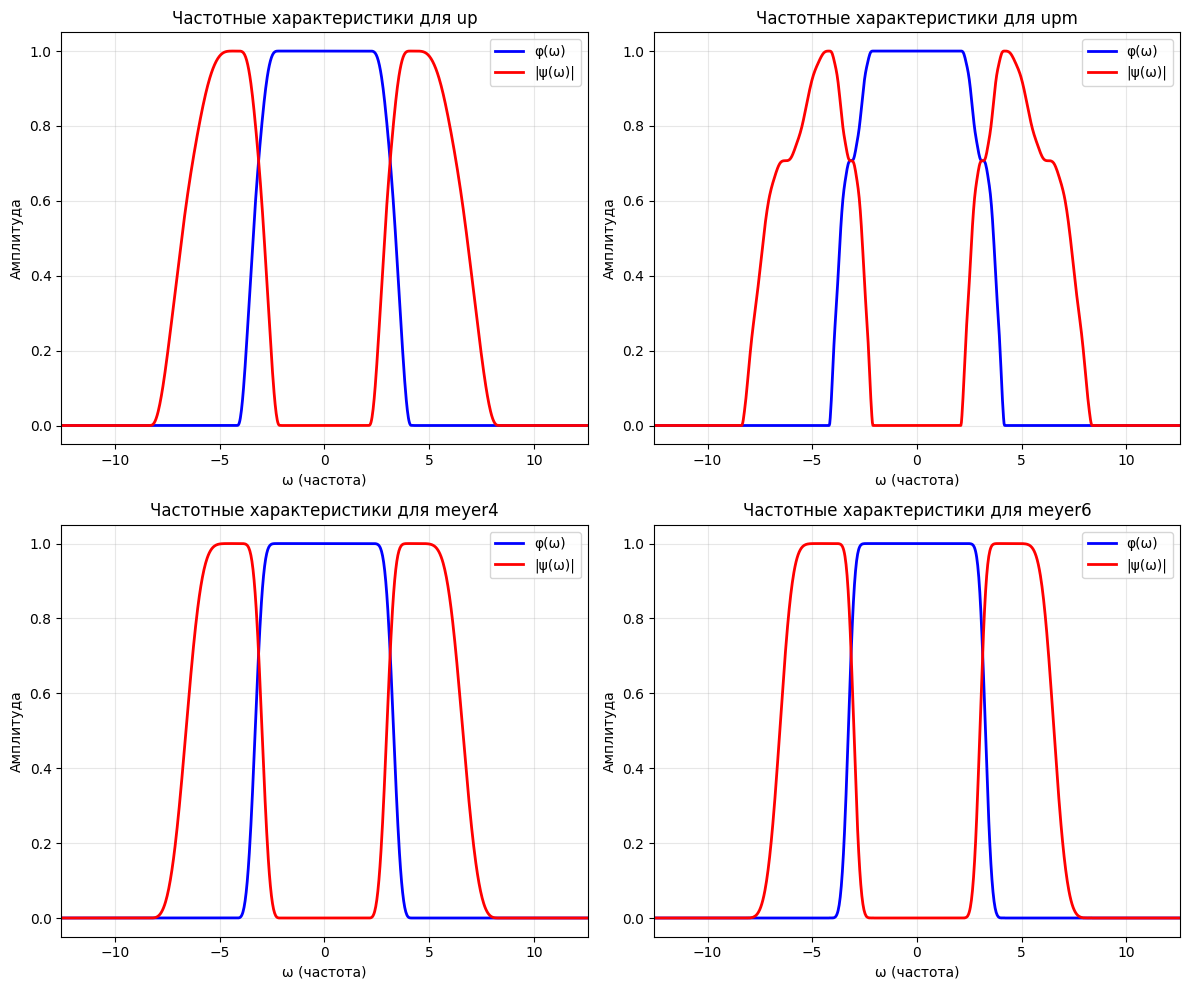


6. Пример вейвлет-преобразования сигнала


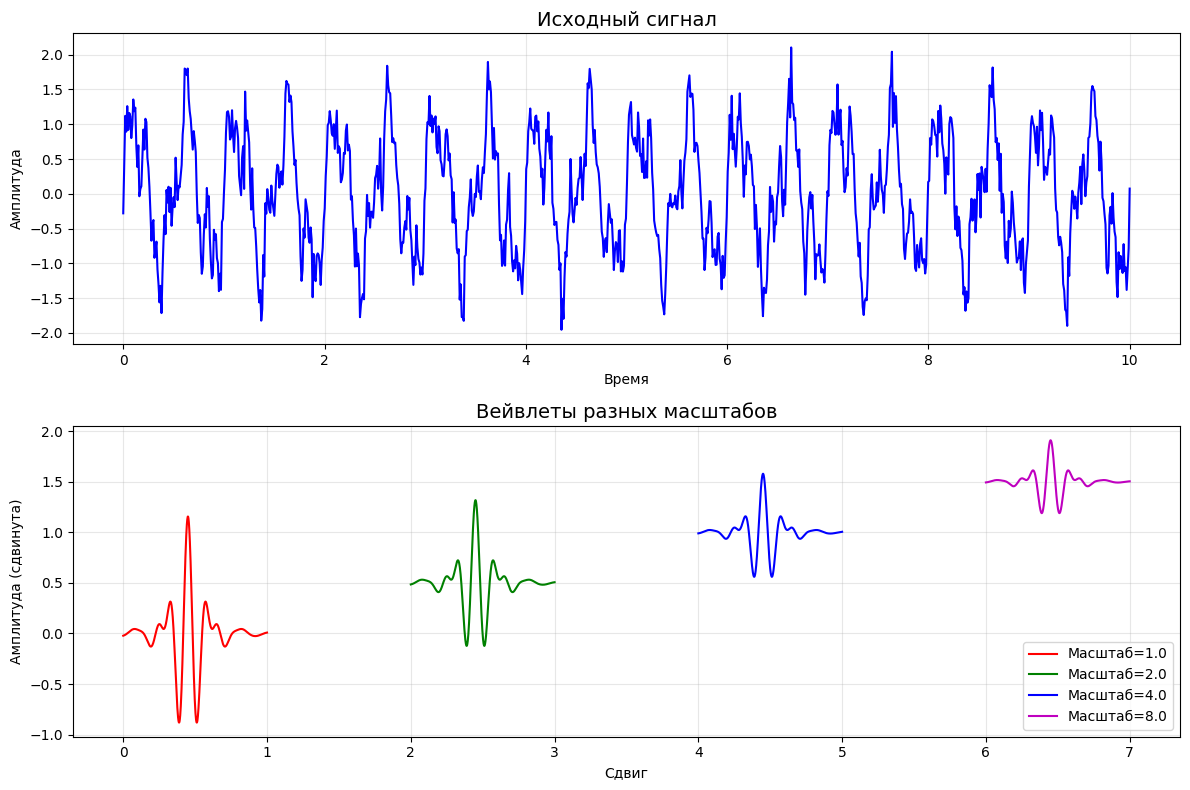


7. Сравнение коэффициентов фильтров разных вейвлетов


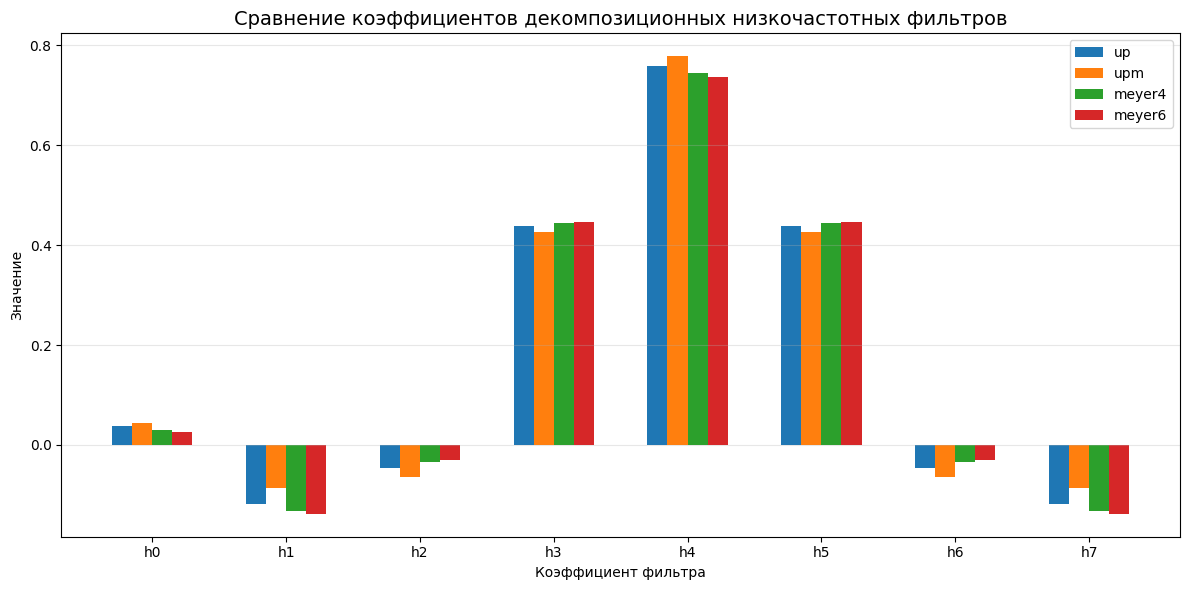

Все графики построены!


In [16]:

# Создадим фигуру для всех графиков
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle('Вейвлеты и их свойства', fontsize=16, y=1.02)

# 1. Сравнение функций chi для разных вейвлетов
print("1. Сравнение функций chi для разных вейвлетов")

x = torch.linspace(-5, 5, 1000)
wavelet_types = ['up', 'upm', 'meyer4', 'meyer6']

for idx, waf in enumerate(wavelet_types):
    ax = axes[0, idx]

    if waf == 'upm':
        wavelet = Wavelet(waf, coef=2)
    else:
        wavelet = Wavelet(waf)

    chi_values = wavelet.chi(x)

    ax.plot(x.numpy(), chi_values.numpy(), 'b-', linewidth=2)
    ax.set_title(f'χ(x) для {waf}', fontsize=12)
    ax.set_xlabel('x')
    ax.set_ylabel('χ(x)')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.2, 1.2])

# 2. Вейвлеты во временной области
print("\n2. Вейвлеты во временной области")

x_psi = torch.linspace(-10, 10, 1000)

for idx, waf in enumerate(wavelet_types):
    ax = axes[1, idx]

    if waf == 'upm':
        wavelet = Wavelet(waf, coef=2)
    else:
        wavelet = Wavelet(waf)

    psi_values = wavelet.psi(x_psi, N=5000)

    ax.plot(x_psi.numpy(), psi_values.numpy(), 'r-', linewidth=2)
    ax.set_title(f'ψ(x) для {waf}', fontsize=12)
    ax.set_xlabel('x')
    ax.set_ylabel('ψ(x)')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([-10, 10])

# 3. Масштабирующие функции во временной области
print("\n3. Масштабирующие функции во временной области")

x_phi = torch.linspace(-10, 10, 1000)

for idx, waf in enumerate(wavelet_types):
    ax = axes[2, idx]

    if waf == 'upm':
        wavelet = Wavelet(waf, coef=2)
    else:
        wavelet = Wavelet(waf)

    phi_values = wavelet.phi(x_phi, N=5000)

    ax.plot(x_phi.numpy(), phi_values.numpy(), 'g-', linewidth=2)
    ax.set_title(f'φ(x) для {waf}', fontsize=12)
    ax.set_xlabel('x')
    ax.set_ylabel('φ(x)')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([-10, 10])

plt.tight_layout()
plt.show()

# 4. Фильтры для вейвлет-преобразования
print("\n4. Фильтры для вейвлет-преобразования")

N = 16  # Длина фильтра
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 10))

for idx, waf in enumerate(wavelet_types):
    if waf == 'upm':
        wavelet = Wavelet(waf, coef=2)
    else:
        wavelet = Wavelet(waf)

    filters = wavelet.filter(N)

    # Создаем сетку для подграфиков
    row = idx // 2
    col = idx % 2
    ax = axes2[row, col]

    n = torch.arange(-N//2, N//2)

    ax.stem(n.numpy(), filters['dec_lo'].numpy(), 'b', markerfmt='bo', basefmt=' ', label='dec_lo')
    ax.stem(n.numpy(), filters['dec_hi'].numpy(), 'r', markerfmt='ro', basefmt=' ', label='dec_hi')
    ax.set_title(f'Фильтры для {waf} (N={N})', fontsize=12)
    ax.set_xlabel('n')
    ax.set_ylabel('Значение')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_xlim([-N//2, N//2-1])

plt.tight_layout()
plt.show()

# 5. Частотные характеристики вейвлетов
print("\n5. Частотные характеристики вейвлетов")

fig3, axes3 = plt.subplots(2, 2, figsize=(12, 10))
w = torch.linspace(-4*np.pi, 4*np.pi, 1000)

for idx, waf in enumerate(wavelet_types):
    if waf == 'upm':
        wavelet = Wavelet(waf, coef=2)
    else:
        wavelet = Wavelet(waf)

    phi_f_values = wavelet.phi_f(w)
    psi_f_values = wavelet.psi_f(w)

    row = idx // 2
    col = idx % 2
    ax = axes3[row, col]

    ax.plot(w.numpy(), phi_f_values.numpy(), 'b-', linewidth=2, label='φ(ω)')
    ax.plot(w.numpy(), np.abs(psi_f_values.numpy()), 'r-', linewidth=2, label='|ψ(ω)|')
    ax.set_title(f'Частотные характеристики для {waf}', fontsize=12)
    ax.set_xlabel('ω (частота)')
    ax.set_ylabel('Амплитуда')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_xlim([-4*np.pi, 4*np.pi])

plt.tight_layout()
plt.show()

# 6. Пример вейвлет-преобразования сигнала
print("\n6. Пример вейвлет-преобразования сигнала")

# Создаем тестовый сигнал
t = torch.linspace(0, 10, 1000)
signal = (torch.sin(2*np.pi*2*t) +
          0.5*torch.sin(2*np.pi*5*t) +
          0.3*torch.sin(2*np.pi*10*t) +
          0.2*torch.randn(1000))

# Выбираем вейвлет для анализа
wavelet = Wavelet('meyer4')

# Вычисляем вейвлет во временной области для разных масштабов
scales = torch.tensor([1.0, 2.0, 4.0, 8.0])
psi_wavelets = []

for scale in scales:
    x_psi = torch.linspace(-5*scale, 5*scale, 1000)
    psi = wavelet.psi(x_psi/scale, N=5000) / torch.sqrt(scale)
    psi_wavelets.append(psi)

# Визуализация
fig4, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Исходный сигнал
ax1.plot(t.numpy(), signal.numpy(), 'b-', linewidth=1.5)
ax1.set_title('Исходный сигнал', fontsize=14)
ax1.set_xlabel('Время')
ax1.set_ylabel('Амплитуда')
ax1.grid(True, alpha=0.3)

# Вейвлеты разных масштабов
colors = ['r', 'g', 'b', 'm']
for idx, (scale, psi, color) in enumerate(zip(scales, psi_wavelets, colors)):
    x_display = torch.linspace(idx*2, idx*2+1, len(psi))
    ax2.plot(x_display.numpy(), psi.numpy() + idx*0.5, color=color,
             linewidth=1.5, label=f'Масштаб={scale}')

ax2.set_title('Вейвлеты разных масштабов', fontsize=14)
ax2.set_xlabel('Сдвиг')
ax2.set_ylabel('Амплитуда (сдвинута)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. Сравнение коэффициентов фильтров
print("\n7. Сравнение коэффициентов фильтров разных вейвлетов")

N = 8
fig5, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.15
x_pos = np.arange(N)

for idx, waf in enumerate(wavelet_types):
    if waf == 'upm':
        wavelet =Wavelet(waf, coef=2)
    else:
        wavelet = Wavelet(waf)

    filters = wavelet.filter(N)

    ax.bar(x_pos + idx*bar_width, filters['dec_lo'].numpy(),
           width=bar_width, label=f'{waf}')

ax.set_xlabel('Коэффициент фильтра')
ax.set_ylabel('Значение')
ax.set_title('Сравнение коэффициентов декомпозиционных низкочастотных фильтров', fontsize=14)
ax.set_xticks(x_pos + bar_width*1.5)
ax.set_xticklabels([f'h{i}' for i in range(N)])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Все графики построены!")